In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


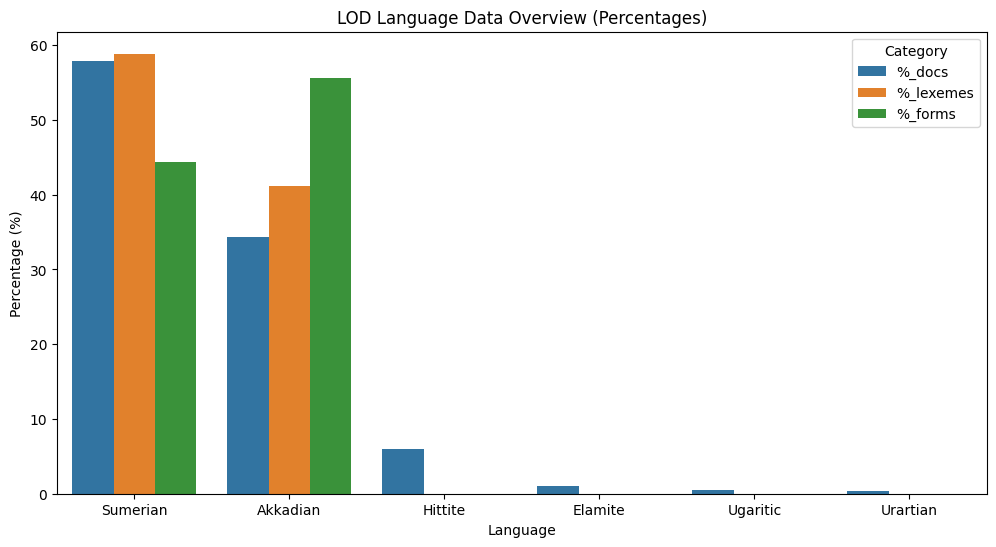

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Data as provided
data = {
    'Language': ['Sumerian', 'Akkadian', 'Hittite', 'Elamite', 'Ugaritic', 'Urartian'],
    '#_docs': [143362, 85187, 14673, 2702, 1107, 742],
    '#_lexemes': [5283, 3692, 0, 0, 0, 0],
    '#_forms': [165845, 207447, 0, 0, 0, 0],
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate percentages
df['%_docs'] = df['#_docs'] / df['#_docs'].sum() * 100
df['%_lexemes'] = df['#_lexemes'] / df['#_lexemes'].sum() * 100
df['%_forms'] = df['#_forms'] / df['#_forms'].sum() * 100

# Convert the DataFrame to a "long-form" or "tidy" format
df_long = df.melt(id_vars='Language', value_vars=['%_docs', '%_lexemes', '%_forms'],
                  var_name='Category', value_name='Percentage')

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 6))

# Plot the data using seaborn
sns.barplot(x='Language', y='Percentage', hue='Category', data=df_long)

# Customize the axes and title
ax.set_title('LOD Language Data Overview (Percentages)')
ax.set_xlabel('Language')
ax.set_ylabel('Percentage (%)')

# Improve the legend
plt.legend(title='Category')

# Show the plot
plt.show()



In [ ]:
matched = pd.read_csv('/content/drive/MyDrive/Tina/matched.csv')
matched

,Unnamed: 0.1,Unnamed: 0,Text,Lemma,POS,Tag,Dep,Shape,Is_Alpha,Is_Stop,lexeme,lexemeLabel,lexical_category,lexical_categoryLabel
0,0,1,Pascal,pascal,NOUN,NOUN,ROOT,Xxxxx,True,False,http://www.wikidata.org/entity/L19080,pascal,http://www.wikidata.org/entity/Q1084,noun
1,2,1685,Pascal,pascal,NOUN,NOUN,ROOT,Xxxxx,True,False,http://www.wikidata.org/entity/L19080,pascal,http://www.wikidata.org/entity/Q1084,noun
2,4,3252,Pascal,pascal,NOUN,NOUN,nsubj,Xxxxx,True,False,http://www.wikidata.org/entity/L19080,pascal,http://www.wikidata.org/entity/Q1084,noun
3,6,5316,Pascal,pascal,NOUN,NOUN,ROOT,Xxxxx,True,False,http://www.wikidata.org/entity/L19080,pascal,http://www.wikidata.org/entity/Q1084,noun
4,8,7309,Pascal,pascal,NOUN,NOUN,ROOT,Xxxxx,True,False,http://www.wikidata.org/entity/L19080,pascal,http://www.wikidata.org/entity/Q1084,noun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8109,22750,20745,précisément,précisément,ADV,ADV,advmod,xxxx,True,False,http://www.wikidata.org/entity/L13176,précisément,http://www.wikidata.org/entity/Q380057,adverb
8110,22751,20747,troncs,tronc,NOUN,NOUN,conj,xxxx,True,False,http://www.wikidata.org/entity/L24815,tronc,http://www.wikidata.org/entity/Q1084,noun
8111,22752,20749,bois,bois,NOUN,NOUN,nmod,xxxx,True,False,http://www.wikidata.org/entity/L9316,bois,http://www.wikidata.org/entity/Q1084,noun
8112,22753,20767,désignerait,désigner,VERB,VERB,ROOT,xxxx,True,False,http://www.wikidata.org/entity/L15195,désigner,http://www.wikidata.org/entity/Q24905,verb


In [ ]:
matched_clean = matched[['Text','Lemma','POS','lexeme']]
matched_clean.columns = ['Text','lexeme','POS','wikidata']
matched_clean = matched_clean.drop_duplicates(subset = ['lexeme'], keep='first')
matched_clean.head(15)

,Text,lexeme,POS,wikidata
0,Pascal,pascal,NOUN,http://www.wikidata.org/entity/L19080
6,tablets,tablet,NOUN,http://www.wikidata.org/entity/L227933
67,in,in,X,http://www.wikidata.org/entity/L322367
166,the,the,X,http://www.wikidata.org/entity/L2768
304,collections,collecter,VERB,http://www.wikidata.org/entity/L26125
353,of,of,X,http://www.wikidata.org/entity/L2986
523,Chicago,Chicago,PROPN,http://www.wikidata.org/entity/L578404
580,propos,propos,NOUN,http://www.wikidata.org/entity/L10027
593,de,de,ADP,http://www.wikidata.org/entity/L2379
858,AK,ak,NOUN,http://www.wikidata.org/entity/L726793


<ipython-input-5-12a2cb2a814a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pos_plot = sns.barplot(x='POS', y='Percentage', data=pos_counts_df, palette='husl')


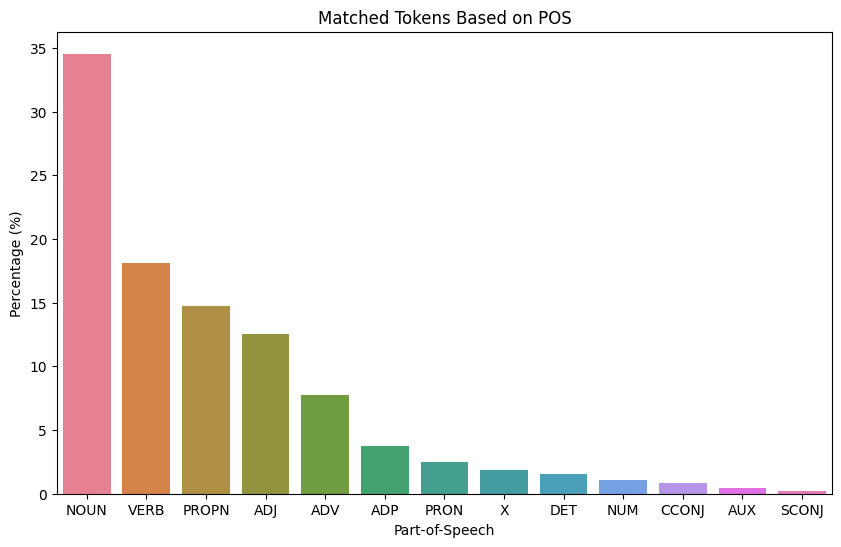

In [ ]:
pos_counts = matched_clean['POS'].value_counts(normalize=True) * 100

# Reset index to turn the series into a DataFrame
pos_counts_df = pos_counts.reset_index()
pos_counts_df.columns = ['POS', 'Percentage']

# Plotting using seaborn
plt.figure(figsize=(10, 6))
pos_plot = sns.barplot(x='POS', y='Percentage', data=pos_counts_df, palette='husl')

# Add title and labels
plt.title('Matched Tokens Based on POS')
plt.xlabel('Part-of-Speech')
plt.ylabel('Percentage (%)')

# Show the plot
plt.show()

In [ ]:
unmatched = pd.read_csv('/content/drive/MyDrive/Tina/unmatched.csv')
unmatched

,Unnamed: 0,Text,Lemma,POS,Tag,Dep,Shape,Is_Alpha,Is_Stop
0,0,46,46,NUM,NUM,nummod,dd,False,False
1,2,Attinger,Attinger,X,X,nummod,Xxxxx,True,False
2,9,Oriental,Oriental,PROPN,PROPN,obj,Xxxxx,True,False
3,10,Institute,Institute,PROPN,PROPN,flat:name,Xxxxx,True,False
4,12,Univ,Univ,PROPN,PROPN,obl:mod,Xxxx,True,False
...,...,...,...,...,...,...,...,...,...
7929,20807,ake,ake,NOUN,NOUN,ROOT,xxx,True,False
7930,20809,-,-,PROPN,PROPN,nmod,-,False,False
7931,20811,-,-,PROPN,PROPN,nmod,-,False,False
7932,20813,-,-,NOUN,NOUN,flat:name,-,False,False


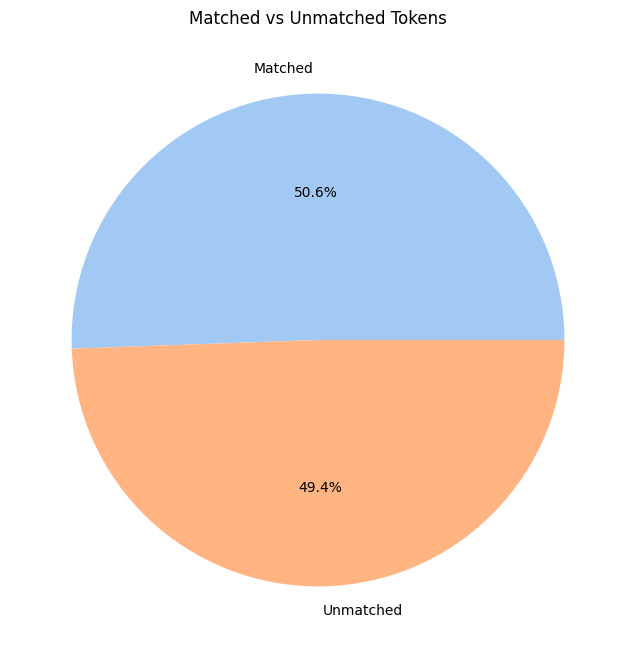

In [ ]:




# Data for plotting
labels = ['Matched', 'Unmatched']
sizes = [8114, 7934]

# Setting the color palette using Seaborn
colors = sns.color_palette('pastel')[0:2]

# Plotting the pie chart with Seaborn's color palette
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

# Adding title
plt.title('Matched vs Unmatched Tokens')

# Display the plot
plt.show()


<ipython-input-8-e02cc26b66d3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pos_plot = sns.barplot(x='POS', y='Percentage', data=pos_counts_df, palette='husl')


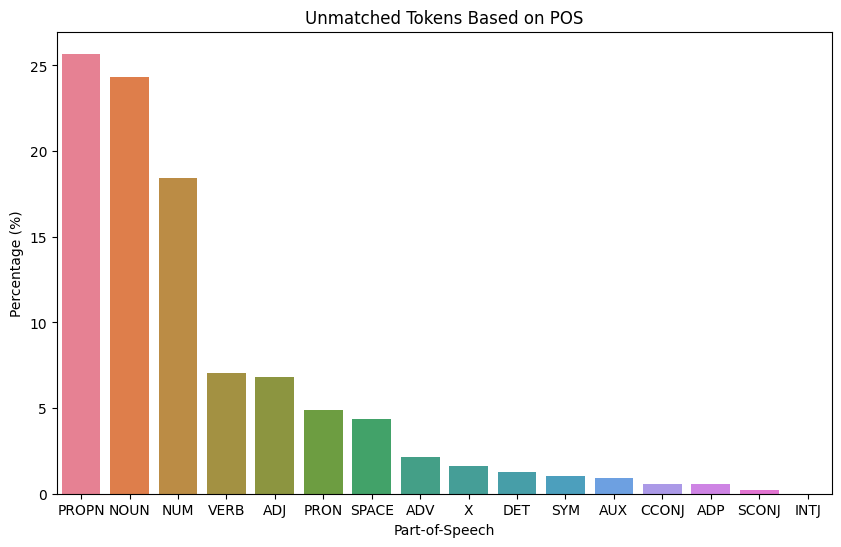

In [ ]:
pos_counts = unmatched['POS'].value_counts(normalize=True) * 100

# Reset index to turn the series into a DataFrame
pos_counts_df = pos_counts.reset_index()
pos_counts_df.columns = ['POS', 'Percentage']

# Plotting using seaborn
plt.figure(figsize=(10, 6))
pos_plot = sns.barplot(x='POS', y='Percentage', data=pos_counts_df, palette='husl')

# Add title and labels
plt.title('Unmatched Tokens Based on POS')
plt.xlabel('Part-of-Speech')
plt.ylabel('Percentage (%)')

# Show the plot
plt.show()

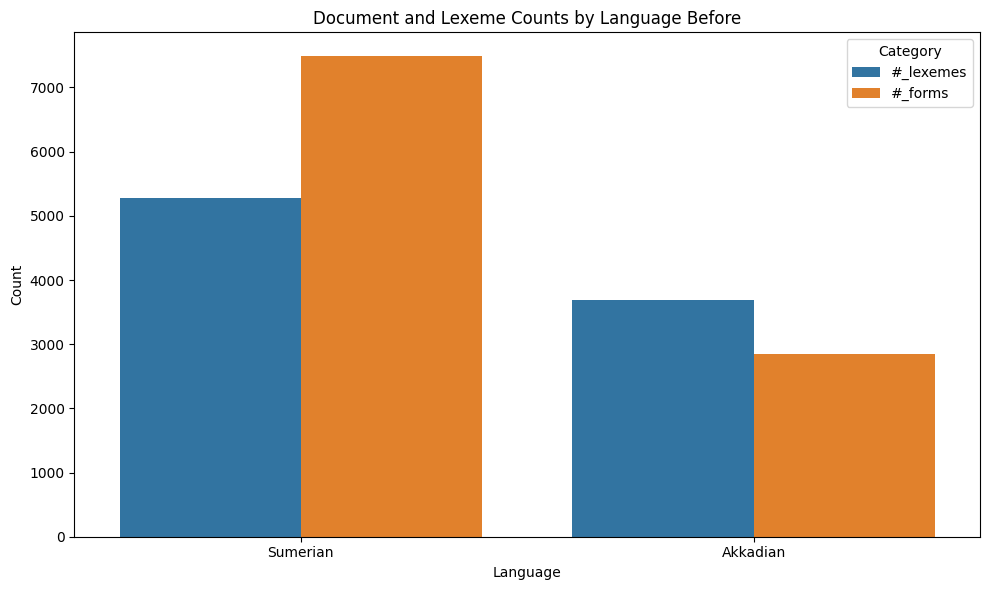

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data provided by the user
data_old = {
    # 'Language': ['Sumerian', 'Akkadian', 'Hittite', 'Elamite', 'Ugaritic', 'Urartian'],
    'Language': ['Sumerian', 'Akkadian'],

    # '#_docs': [143362, 85187, 14673, 2702, 1107, 742],
    '#_lexemes': [5283, 3692],  # Assuming zero for missing values in the image
    '#_forms': [7485, 2847],    # Assuming zero for missing values in the image
}

# Create DataFrame
df = pd.DataFrame(data_old)

# Melt the DataFrame to convert it from wide to long format
df_long = pd.melt(df, id_vars='Language', var_name='Category', value_name='Count')

# Initialize the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot the data using seaborn
sns.barplot(x='Language', y='Count', hue='Category', data=df_long)

# Add title and labels
plt.title('Document and Lexeme Counts by Language Before')
plt.xlabel('Language')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()  # Adjust layout to fit the plot well within the figure area
plt.show()

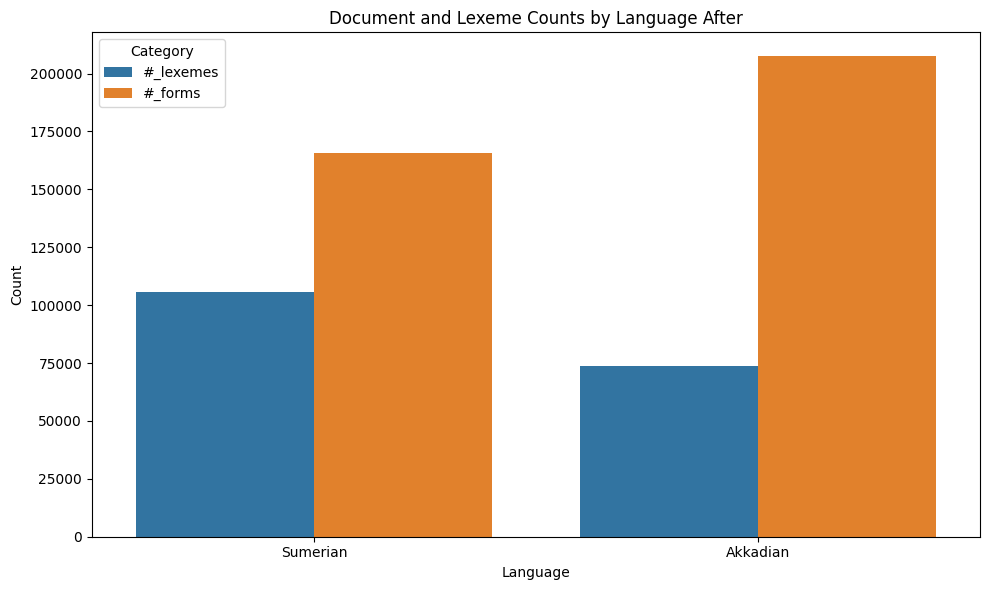

In [ ]:
# Data as provided
data_new = {
    # 'Language': ['Sumerian', 'Akkadian', 'Hittite', 'Elamite', 'Ugaritic', 'Urartian'],
    'Language': ['Sumerian', 'Akkadian'],
    # '#_docs': [143362, 85187, 14673, 2702, 1107, 742],
    '#_lexemes': [5283 * 2 * 10, 3692 * 2 * 10],
    '#_forms': [165845, 207447],
}
df = pd.DataFrame(data_new)

# Melt the DataFrame to convert it from wide to long format
df_long = pd.melt(df, id_vars='Language', var_name='Category', value_name='Count')

# Initialize the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot the data using seaborn
sns.barplot(x='Language', y='Count', hue='Category', data=df_long)

# Add title and labels
plt.title('Document and Lexeme Counts by Language After')
plt.xlabel('Language')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()  # Adjust layout to fit the plot well within the figure area
plt.show()

Text(0, 0.5, 'Count')

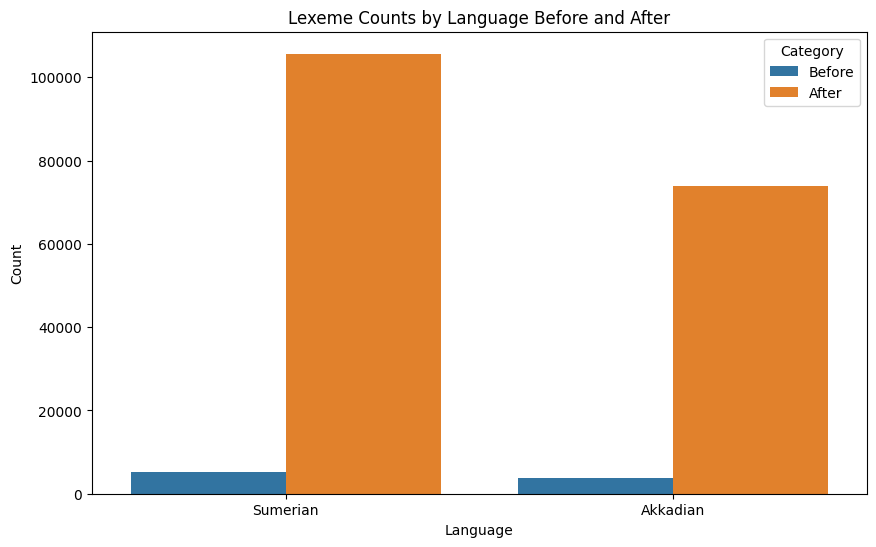

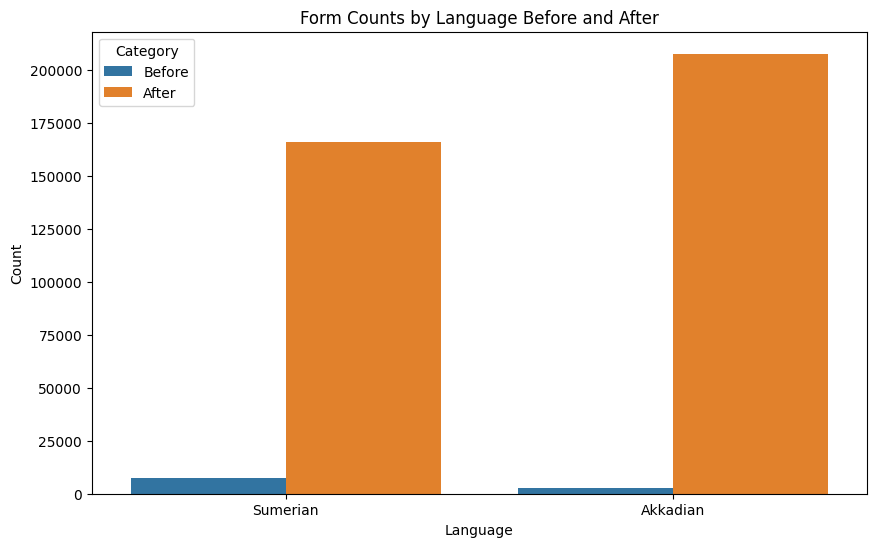

In [ ]:
lem = pd.DataFrame({
    # 'Language': ['Sumerian', 'Akkadian', 'Hittite', 'Elamite', 'Ugaritic', 'Urartian'],
    'Language': ['Sumerian', 'Akkadian'],

    # '#_docs': [143362, 85187, 14673, 2702, 1107, 742],
    'Before': [5283, 3692],  # Assuming zero for missing values in the image
    'After': [5283 * 2 * 10, 3692 * 2 * 10],    # Assuming zero for missing values in the image
})
forms = pd.DataFrame({
    # 'Language': ['Sumerian', 'Akkadian', 'Hittite', 'Elamite', 'Ugaritic', 'Urartian'],
    'Language': ['Sumerian', 'Akkadian'],

    # '#_docs': [143362, 85187, 14673, 2702, 1107, 742],
    'Before': [7485, 2847],  # Assuming zero for missing values in the image
    'After': [165845, 207447],    # Assuming zero for missing values in the image
})
df_long = pd.melt(lem, id_vars='Language', var_name='Category', value_name='Count')

# Initialize the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot the data using seaborn
sns.barplot(x='Language', y='Count', hue='Category', data=df_long)

# Add title and labels
plt.title('Lexeme Counts by Language Before and After')
plt.xlabel('Language')
plt.ylabel('Count')

df_long_2 = pd.melt(forms, id_vars='Language', var_name='Category', value_name='Count')

# Initialize the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot the data using seaborn
sns.barplot(x='Language', y='Count', hue='Category', data=df_long_2)

# Add title and labels
plt.title('Form Counts by Language Before and After')
plt.xlabel('Language')
plt.ylabel('Count')